In [2]:
from edc import setup_environment_variables
setup_environment_variables()

API credentials have automatically been injected for your active subscriptions.  
The following environment variables are now available:
* `SH_CLIENT_ID`, `SH_CLIENT_NAME`, `SH_CLIENT_SECRET`, `SH_INSTANCE_ID`



In [3]:
from edc import check_compatibility
check_compatibility("user-0.22.3")

## EDC Sentinel Hub - using xcube to access different data sets in Sentinel Hub

This notebook shows how to access different data sets through the Sentinel Hub API:

1. Access **Sentiel-2 L2A** through xcube Sentinel hub Store
2. Access **Sentiel-2 L1C** through xcube Sentinel hub Store
3. Access **Sentiel-1 GRD** through xcube Sentinel hub Store
4. Access **DEM** through xcube Sentinel hub Store

In [4]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import xarray as xr
import numpy as np
import IPython.display
import shapely.geometry

## Set location: Laguna de Bay 

In [5]:
bbox =121.030334,14.168978,121.493134,14.547036

In [6]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

In [7]:
spatial_res = 0.00018   # = 20.038 meters in degree

In [8]:
SH = SentinelHub()
SH.dataset_names

['S3SLSTR',
 'CUSTOM',
 'S2L2A',
 'DEM',
 'MODIS',
 'L8L1C',
 'S2L1C',
 'S5PL2',
 'S1GRD',
 'S3OLCI']

## Sentinel-2 L2A

In [9]:
SH.band_names('S2L2A')

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B11',
 'B12',
 'SCL',
 'SNW',
 'CLD',
 'viewZenithMean',
 'viewAzimuthMean',
 'sunZenithAngles',
 'sunAzimuthAngles',
 'AOT',
 'CLM',
 'CLP']

In [10]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['SCL'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

/opt/conda/envs/eurodatacube-0.22.3/lib/python3.8/site-packages/xcube_sh/config.py:92: UserWarning: the geometry parameter is no longer supported, use bbox instead
  warnings.warn('the geometry parameter is no longer supported, use bbox instead')


In [11]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2560, lon: 3072, time: 9)
Coordinates:
  * lat        (lat) float64 14.63 14.63 14.63 14.63 ... 14.17 14.17 14.17 14.17
  * lon        (lon) float64 121.0 121.0 121.0 121.0 ... 121.6 121.6 121.6 121.6
  * time       (time) datetime64[ns] 2018-05-18T02:29:29 ... 2018-07-27T02:21:25
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(9, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2021-01-27T12:50:02.049037
    processing_level:        L2A
    time_coverage_start:     2018-05-18T02:29:29+00:00
    time_coverage_end:       2018-07-27T02:21:25+00:00
    time_coverage_duration:  P69DT23H51M56S
    geospatial_lon_min:      121.030334
    geospatial_lat_min:      14.168978
    geospatial_lon_max:      121.583294
    geospatial_lat_max:      14.629778

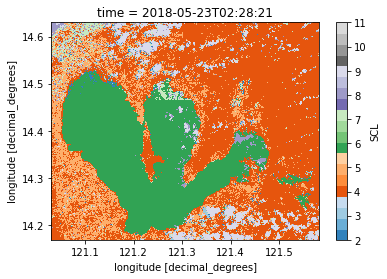

In [12]:
cube.SCL.isel(time=1).plot.imshow(cmap='tab20c')

## Sentinel-2 L1C

In [13]:
SH.band_names('S2L1C')

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B10',
 'B11',
 'B12',
 'viewZenithMean',
 'viewAzimuthMean',
 'sunZenithAngles',
 'sunAzimuthAngles',
 'CLM',
 'CLP']

In [14]:
cube_config = CubeConfig(dataset_name='S2L1C',
                         band_names=['B04'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

/opt/conda/envs/eurodatacube-0.22.3/lib/python3.8/site-packages/xcube_sh/config.py:92: UserWarning: the geometry parameter is no longer supported, use bbox instead
  warnings.warn('the geometry parameter is no longer supported, use bbox instead')


In [15]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2560, lon: 3072, time: 15)
Coordinates:
  * lat        (lat) float64 14.63 14.63 14.63 14.63 ... 14.17 14.17 14.17 14.17
  * lon        (lon) float64 121.0 121.0 121.0 121.0 ... 121.6 121.6 121.6 121.6
  * time       (time) datetime64[ns] 2018-05-18T02:29:29 ... 2018-07-27T02:21:25
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(15, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L1C Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2021-01-27T12:50:22.325214
    processing_level:        L1C
    time_coverage_start:     2018-05-18T02:29:29+00:00
    time_coverage_end:       2018-07-27T02:21:25+00:00
    time_coverage_duration:  P69DT23H51M56S
    geospatial_lon_min:      121.030334
    geospatial_lat_min:      14.168978
    geospatial_lon_max:      121.583294
    geospatial_lat_max:      14.629778

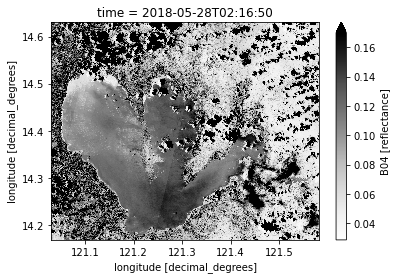

In [16]:
cube.B04.isel(time=2).plot.imshow(cmap='Greys', vmax = .17)

## Sentinel-1 GRD

In [17]:
SH.band_names('S1GRD')

['VV', 'HH', 'VH', 'localIncidenceAngle', 'scatteringArea', 'shadowMask', 'HV']

In [18]:
# x1 = 10.00  # degree
# y1 = 54.27  # degree
# x2 = 10.50  # degree
# y2 = 54.60  # degree

# bbox = x1, y1, x2, y2

In [19]:
spatial_res = 0.00018 

In [20]:
cube_config = CubeConfig(dataset_name='S1GRD',
                         band_names=['VH'],
                         tile_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         geometry=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='2D')  

/opt/conda/envs/eurodatacube-0.22.3/lib/python3.8/site-packages/xcube_sh/config.py:92: UserWarning: the geometry parameter is no longer supported, use bbox instead
  warnings.warn('the geometry parameter is no longer supported, use bbox instead')


In [21]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2560, lon: 3072, time: 40)
Coordinates:
  * lat        (lat) float64 14.63 14.63 14.63 14.63 ... 14.17 14.17 14.17 14.17
  * lon        (lon) float64 121.0 121.0 121.0 121.0 ... 121.6 121.6 121.6 121.6
  * time       (time) datetime64[ns] 2019-05-15 2019-05-17 ... 2019-08-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    VH         (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S1GRD Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2021-01-27T12:50:44.837719
    processing_level:          L1B
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-02T00:00:00+00:00
    time_coverage_duration:    P80DT0H0M0S
    time_coverage_resolution:  P2DT0H0M0S
    geospatial_lon_min:        121.030334
    geospatial_lat_min:        14.168978
    geospatial_lon_max:        121.583294
    geospatial_lat_max:        14.629778

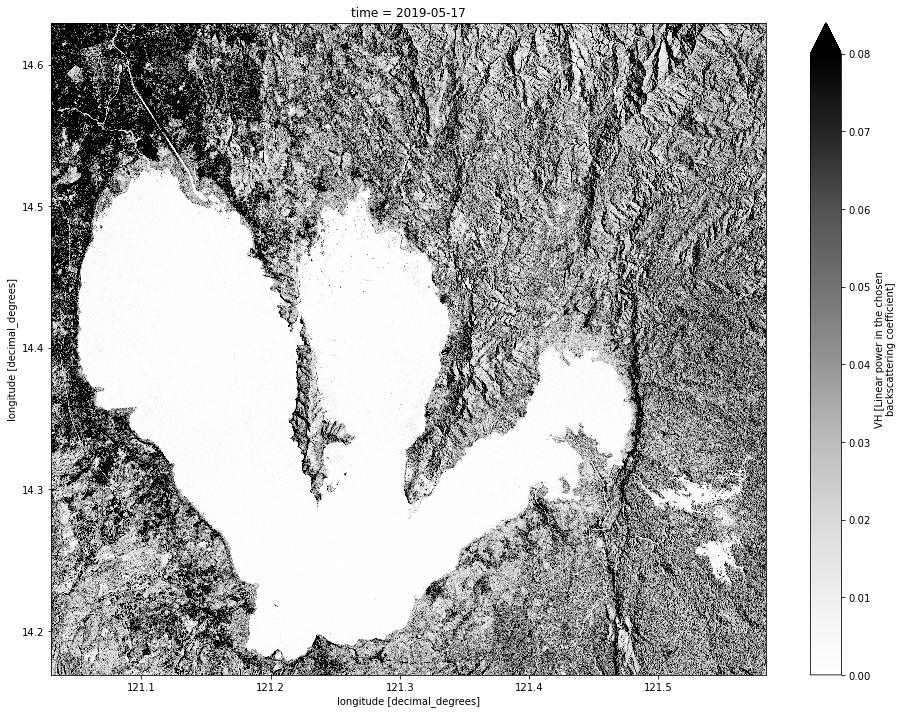

In [22]:
cube.VH.isel(time=1).plot.imshow(cmap='Greys',vmax =0.08, figsize = [16,12])

In [23]:
SH.dataset_names

['DEM',
 'L8L1C',
 'S3SLSTR',
 'S1GRD',
 'MODIS',
 'S2L1C',
 'CUSTOM',
 'S5PL2',
 'S2L2A',
 'S3OLCI']

## Digital Elevation Model

In [24]:
SH.band_names('DEM')

['DEM', 'DEM']

In [25]:
mayon_bbox = 123.644806,13.213101,123.734241,13.290922

In [26]:
spatial_res = 0.0002

In [27]:
cube_config = CubeConfig(dataset_name='DEM',
                         band_names=['DEM'],
                         tile_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         bbox=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='2D')  

In [28]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2048, lon: 2560, time: 40)
Coordinates:
  * lat        (lat) float64 14.58 14.58 14.58 14.58 ... 14.17 14.17 14.17 14.17
  * lon        (lon) float64 121.0 121.0 121.0 121.0 ... 121.5 121.5 121.5 121.5
  * time       (time) datetime64[ns] 2019-05-15 2019-05-17 ... 2019-08-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    DEM        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     DEM Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2021-01-27T12:51:11.953431
    processing_level:          None
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-02T00:00:00+00:00
    time_coverage_duration:    P80DT0H0M0S
    time_coverage_resolution:  P2DT0H0M0S
    geospatial_lon_min:        121.030334
    geospatial_lat_min:        14.168978
    geospatial_lon_max:        121.542334
    geospatial_lat_max:        14.578577999999998

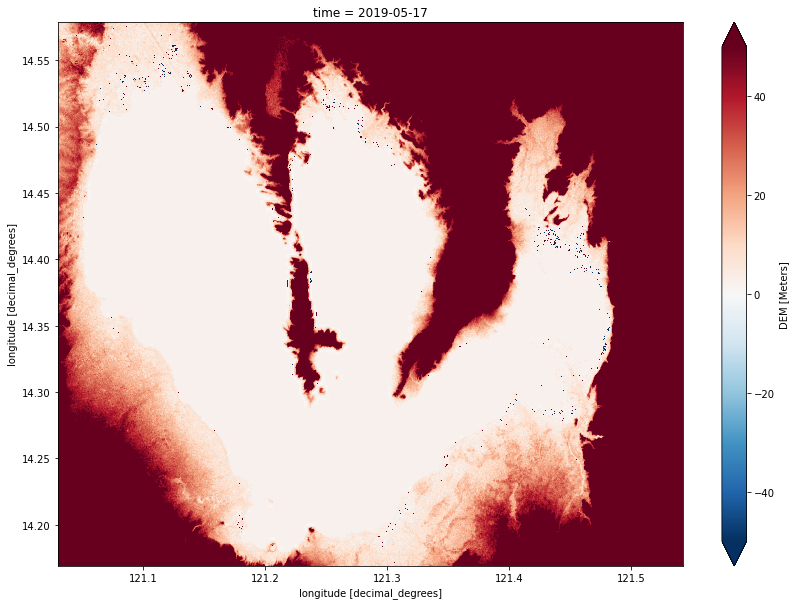

In [29]:
cube.DEM.isel(time=1).plot.imshow(vmin = -50, figsize = [14,10])